[[0.56633395]
 [0.3182496 ]
 [0.22550797]
 [0.19628596]
 [0.16804251]
 [0.11561999]
 [0.10940234]
 [0.09496981]
 [0.08703024]
 [0.08083604]
 [0.07095625]
 [0.07832121]
 [0.06218099]
 [0.06466711]
 [0.04783469]
 [0.04685977]
 [0.04408773]
 [0.04586667]
 [0.03980104]
 [0.04601581]
 [0.03583236]
 [0.03747743]
 [0.0374106 ]
 [0.02933256]
 [0.03331428]
 [0.03404337]
 [0.02588492]
 [0.02837785]
 [0.02882136]
 [0.02552325]
 [0.0291086 ]
 [0.02603379]
 [0.02466932]
 [0.02714457]
 [0.0222171 ]
 [0.02506211]
 [0.02342358]
 [0.02056241]
 [0.02532621]
 [0.02110711]
 [0.02113736]
 [0.02161901]
 [0.01877976]
 [0.02257192]
 [0.01952614]
 [0.02043892]
 [0.01698495]
 [0.01991684]
 [0.01650543]
 [0.01839635]
 [0.01702107]
 [0.01735534]
 [0.01649608]
 [0.01729452]
 [0.01659808]
 [0.01679316]
 [0.01450685]
 [0.01280465]
 [0.01608378]
 [0.01869317]
 [0.01223055]
 [0.01327027]
 [0.01447607]
 [0.01424739]
 [0.01292934]
 [0.01494065]
 [0.01258844]
 [0.0139494 ]
 [0.01444524]
 [0.01307314]
 [0.01269855]
 [0.01

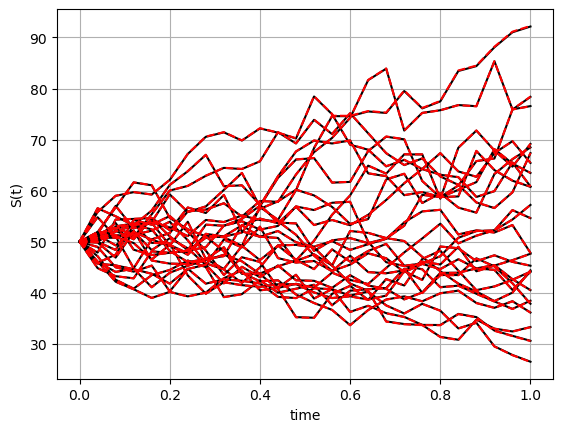

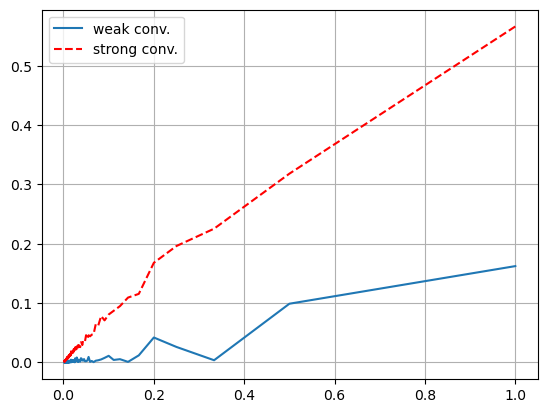

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0
    
    # Exact
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] =S_0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i]) \
                    + 0.5 * sigma**2 * S1[:,i] * (np.power((W[:,i+1] - W[:,i]),2) - dt)
                    
        S2[:,i+1] = S2[:,i] * np.exp((r - 0.5*sigma*sigma) *dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] +dt
        
    # Retun S1 and S2
    paths = {"time":time,"S1":S1,"S2":S2}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 25
    T = 1
    r = 0.06
    sigma = 0.3
    S_0 = 50
    
    # Simulated paths
    Paths = GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    S1 = Paths["S1"]
    S2 = Paths["S2"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(S1),'k')   
    plt.plot(timeGrid, np.transpose(S2),'--r')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
    # Weak and strong convergence
    NoOfStepsV = range(1,500,1)
    NoOfPaths = 100
    errorWeak = np.zeros([len(NoOfStepsV),1])
    errorStrong = np.zeros([len(NoOfStepsV),1])
    dtV = np.zeros([len(NoOfStepsV),1])
    for idx, NoOfSteps in enumerate(NoOfStepsV):
        Paths = GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
        # Get the paths at T
        S1_atT = Paths["S1"][:,-1]
        S2_atT = Paths["S2"][:,-1]
        errorWeak[idx] = np.abs(np.mean(S1_atT)-np.mean(S2_atT))
        errorStrong[idx] = np.mean(np.abs(S1_atT-S2_atT))
        dtV[idx] = T/NoOfSteps
        
    print(errorStrong)    
    plt.figure(2)
    plt.plot(dtV,errorWeak)
    plt.plot(dtV,errorStrong,'--r')
    plt.grid()
    plt.legend(['weak conv.','strong conv.'])
     
mainCalculation()